In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from keras.layers  import Convolution2D
from keras.layers  import Flatten
from keras.layers  import Dense
from keras.layers  import MaxPooling2D

import os;


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

['fruits-fresh-and-rotten-for-classification']

In [2]:
pth = 'kaggle/input/fruits-fresh-and-rotten-for-classification/'
train = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'
test='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/'


In [3]:
classifier = Sequential()
classifier.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dense(units=6,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                2

In [4]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)
print("\nTraining..")
training_set = train_datagen.flow_from_directory(train,
                                                target_size=(64,64),
                                                batch_size=12,
                                                class_mode='categorical')
test_set = test_datagen.flow_from_directory(test,
                                           target_size=(64,64),
                                           batch_size=12,
                                           class_mode='categorical')


Training..
Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [6]:
Model = classifier.fit(training_set,
                      steps_per_epoch=100,
                      epochs=50,
                      validation_data=test_set,
                      validation_steps=100)

Epoch 1/50
100/100 [==============================] - 32s 301ms/step - loss: 1.4393 - accuracy: 0.3892 - val_loss: 1.1181 - val_accuracy: 0.5283
Epoch 2/50
100/100 [==============================] - 36s 363ms/step - loss: 1.0622 - accuracy: 0.5550 - val_loss: 0.9146 - val_accuracy: 0.6183
Epoch 3/50
100/100 [==============================] - 24s 238ms/step - loss: 1.0173 - accuracy: 0.5692 - val_loss: 0.8163 - val_accuracy: 0.6450
Epoch 4/50
100/100 [==============================] - 23s 230ms/step - loss: 0.8813 - accuracy: 0.6283 - val_loss: 0.7134 - val_accuracy: 0.7200
Epoch 5/50
100/100 [==============================] - 25s 246ms/step - loss: 0.7779 - accuracy: 0.6775 - val_loss: 0.6151 - val_accuracy: 0.7725
Epoch 6/50
100/100 [==============================] - 21s 210ms/step - loss: 0.7371 - accuracy: 0.6992 - val_loss: 0.6696 - val_accuracy: 0.7450
Epoch 7/50
100/100 [==============================] - 21s 213ms/step - loss: 0.7610 - accuracy: 0.6958 - val_loss: 0.6003 - val_ac

In [7]:
classifier.save("fresh1.h5")
classifier.save("/kaggle/working/fresh1.h5")

In [8]:
from keras.models import load_model
mod = load_model('fresh1.h5')
mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

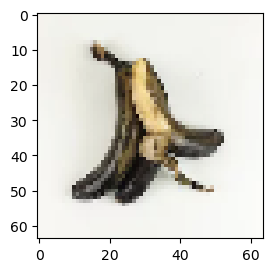

NameError: name 'np' is not defined

In [1]:


from tensorflow.keras.utils import img_to_array,  load_img

classes = ['Fresh Apple','Fresh Banana','Fresh Orange','Rotten Apple','Rotten Banana','Rotten Orange']

filename="/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/rottenbanana/Screen Shot 2018-06-12 at 8.59.02 PM.png"
test_image = load_img(filename,target_size=(64,64))
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.axis("on")
plt.show()
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = mod.predict(test_image)
print("result: ",result)
result1 = result[0]


for i in range(6):
            if result1[i] == 1.:
                break;
prediction = classes[i]
print("the prediction is ", prediction)        